In [2]:
# DataVisualization
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Stats
import scipy as sp
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
# 表示桁数の指定
%precision 3

'%.3f'

In [4]:
# csvを読み込み
pokemon = pd.read_csv('pokemon.csv')
combats = pd.read_csv('combats.csv')
test = pd.read_csv('tests.csv')

In [7]:
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [8]:
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [16]:
names_dict = dict(zip(pokemon['#'], pokemon['Name']))
cols = ["First_pokemon","Second_pokemon","Winner"]
combats_name = combats[cols].replace(names_dict)
combats_name.head()

,First_pokemon,Second_pokemon,Winner
0,Larvitar,Nuzleaf,Nuzleaf
1,Virizion,Terrakion,Terrakion
2,Togetic,Beheeyem,Beheeyem
3,Slugma,Druddigon,Druddigon
4,Omastar,Shuckle,Omastar


### analysis on base stats

count    800.00000
mean     435.10250
std      119.96304
min      180.00000
25%      330.00000
50%      450.00000
75%      515.00000
max      780.00000
Name: stats_sum, dtype: float64


/Users/Takanori/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


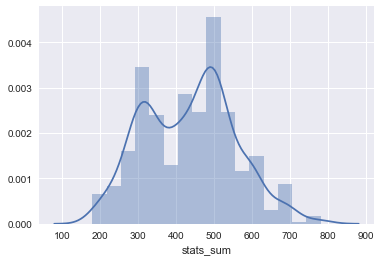

In [18]:
pokemon["stats_sum"] = pokemon["HP"] + pokemon["Attack"] + pokemon["Defense"] \
+ pokemon["Sp. Atk"] + pokemon["Sp. Def"] + pokemon["Speed"]
print(pokemon["stats_sum"].describe())
sns.distplot(pokemon["stats_sum"])
plt.show()

count    50000.000000
mean       136.551440
std        101.221212
min          0.000000
25%         54.000000
50%        118.000000
75%        200.000000
max        590.000000
dtype: float64


/Users/Takanori/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


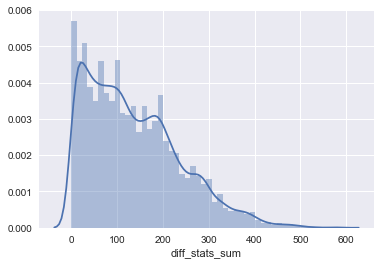

In [29]:
stats_sum_dict = dict(zip(pokemon['#'], pokemon['stats_sum'])) # 数値とstats_sumを辞書型に変換
combats_stats_sum = combats[cols].replace(stats_sum_dict) # どちらが勝ったかを数値で表す
diff_stats_sum = abs(combats_stats_sum["First_pokemon"]-combats_stats_sum["Second_pokemon"]) # 絶対値誤差を算出
print(diff_stats_sum.describe())
sns.distplot(diff_stats_sum)
plt.xlabel("diff_stats_sum")
plt.show()

In [30]:
combats_stats_sum["Loser"] =\
combats_stats_sum.apply(lambda x: x["First_pokemon"] if x["First_pokemon"] !=  x["Winner"] else x["Second_pokemon"], axis = 1)